## Data Dictionary

## products
| Column Name     | Data Type | Description                                    |
|-----------------|-----------|------------------------------------------------|
| ProductName     | String    | Name of the product                            |
| SupplierID      | Integer   | Unique identifier for the supplier             |
| CategoryID      | Integer   | Unique identifier for the category             |
| QuantityPerUnit | String    | Quantity of the product per unit               |
| UnitPrice       | Float     | Price per unit of the product                  |
| UnitsInStock    | Integer   | Number of units currently in stock             |
| UnitsOnOrder    | Integer   | Number of units currently on order             |
| ReorderLevel    | Integer   | Minimum number of units before reorder         |
| Discontinued    | Boolean   | Indicates if the product is discontinued (TRUE/FALSE) |

### categories
| Column Name  | Data Type | Description                                    |
|--------------|-----------|------------------------------------------------|
| CategoryName | String    | Name of the category                           |
| Description  | String    | Description of the category                    |

### orders
| Column Name    | Data Type | Description                                    |
|----------------|-----------|------------------------------------------------|
| OrderID        | Integer   | Unique identifier for the order                |
| CustomerID     | String    | Unique identifier for the customer             |
| EmployeeID     | Integer   | Unique identifier for the employee             |
| OrderDate      | Date      | Date when the order was placed                 |
| RequiredDate   | Date      | Date by which the order is required            |
| ShippedDate    | Date      | Date when the order was shipped                |
| ShipVia        | Integer   | Shipping method identifier                     |
| Freight        | Float     | Freight cost for the order                     |
| ShipName       | String    | Name of the shipper                            |
| ShipAddress    | String    | Shipping address                               |
| ShipCity       | String    | Shipping city                                  |
| ShipRegion     | String    | Shipping region                                |
| ShipPostalCode | String    | Shipping postal code                           |
| ShipCountry    | String    | Shipping country                               |

### order_details
| Column Name | Data Type | Description                                    |
|-------------|-----------|------------------------------------------------|
| OrderID     | Integer   | Unique identifier for the order                |
| ProductID   | Integer   | Unique identifier for the product              |
| UnitPrice   | Float     | Price per unit of the product at the time of the order |
| Quantity    | Integer   | Quantity of the product ordered                |
| Discount    | Float     | Discount applied to the product                |


### locations
| Column Name   | Data Type | Description                                      |
|---------------|-----------|--------------------------------------------------|
| CustomerID    | String    | Unique identifier for the customer               |
| Country       | String    | Country where the customer is located            |




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# import ipywidgets as widgets
# from ipywidgets import interact, HBox, Layout
from IPython.display import display


In [2]:
# Set the display format for float numbers to 2 decimal places 
pd.options.display.float_format = '{:.2f}'.format

In [3]:
products_cols = ["ProductID","ProductName","CategoryID","UndiscountedUnitPrice","UnitsInStock","UnitsOnOrder","ReorderLevel","Discontinued"]
categories_cols = ["CategoryID","CategoryName"]
orders_cols = ["OrderID","CustomerID","OrderDate","ShipCountry"]

products = pd.read_csv("../data/products.csv", usecols=products_cols, encoding='latin1')
categories = pd.read_csv("../data/categories.csv", usecols=categories_cols, encoding='latin1')
orders = pd.read_csv("../data/orders.csv", usecols=orders_cols)
order_details = pd.read_csv("../data/order_details.csv")
locations = pd.read_csv("../data/customers.csv",usecols=['CustomerID', 'Country'])



In [4]:
display(products.head(3), categories.head(3), orders.head(3), order_details.head(3), locations.head(3))

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,$18.00,39,0,10,0
1,2,Chang,1,$19.00,17,40,25,0
2,3,Aniseed Syrup,2,$10.00,13,70,25,0


,CategoryID,CategoryName
0,1,Beverages
1,2,Condiments
2,3,Confections


,OrderID,CustomerID,OrderDate,ShipCountry
0,10389,BOTTM,1995-01-20,Canada
1,10390,ERNSH,1995-01-23,Austria
2,10391,DRACD,1995-01-23,Germany


,OrderID,ProductID,DiscountedUnitPrice,Quantity
0,10248,11,14.00,12
1,10248,42,9.80,10
2,10248,72,34.80,5


,CustomerID,Country
0,ALFLI,Germany
1,ANATR,Mexico
2,ANTON,Mexico


In [5]:
display(products.info(),categories.info(),orders.info(),order_details.info(), locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductID              77 non-null     int64 
 1   ProductName            77 non-null     object
 2   CategoryID             77 non-null     int64 
 3   UndiscountedUnitPrice  77 non-null     object
 4   UnitsInStock           77 non-null     int64 
 5   UnitsOnOrder           77 non-null     int64 
 6   ReorderLevel           77 non-null     int64 
 7   Discontinued           77 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
<class 'pandas.

None

None

None

None

None

## Data Preparation

### Cleaning Data

In [6]:
products["UndiscountedUnitPrice"] = products["UndiscountedUnitPrice"].str.replace("$","").astype("float64")

orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

### Merging the Dataframes

In [7]:
# display(orders.head(), order_details.head())
orders_sales = pd.merge(orders, order_details, on="OrderID")
orders_sales.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60


In [8]:
orders_sales_locations = pd.merge(orders_sales, locations, on="CustomerID")
orders_sales_locations = orders_sales_locations.rename({'Country':"OrderCountry"}, axis=1)
orders_sales_locations.head()

,OrderID,CustomerID,OrderDate,ShipCountry,ProductID,DiscountedUnitPrice,Quantity,OrderCountry
0,10389,BOTTM,1995-01-20,Canada,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,Canada,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,Canada,62,39.40,20,Canada
3,10389,BOTTM,1995-01-20,Canada,70,12.00,30,Canada
4,10390,ERNSH,1995-01-23,Austria,31,10.00,60,Austria


In [9]:
sum(orders_sales_locations.ShipCountry != orders_sales_locations.OrderCountry)

0

In [10]:
# since ALL shipping coutries is the same as the order countries, I will drop one of the column
orders_sales_locations = orders_sales_locations.drop("ShipCountry", axis=1).rename({"OrderCountry":"Country"},axis=1)
orders_sales_locations.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada


In [11]:
products_with_categories = pd.merge(products, categories, on="CategoryID")
products_with_categories.head()

,ProductID,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,1,Chai,1,18.00,39,0,10,0,Beverages
1,2,Chang,1,19.00,17,40,25,0,Beverages
2,3,Aniseed Syrup,2,10.00,13,70,25,0,Condiments
3,4,Chef Anton's Cajun Seasoning,2,22.00,53,0,0,0,Condiments
4,5,Chef Anton's Gumbo Mix,2,21.35,0,0,0,1,Condiments


In [12]:
sum(products_with_categories.ProductID.duplicated())

0

In [13]:
products_analysis = pd.merge(orders_sales_locations, products_with_categories, on = "ProductID")
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,PÃ¢tÃ© chinois,6,24.00,115,0,20,0,Meat/Poultry
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections


In [14]:
products_analysis["TotalSales"] = products_analysis["DiscountedUnitPrice"]*products_analysis["Quantity"]
products_analysis["Discount"] = products_analysis["UndiscountedUnitPrice"]-products_analysis["DiscountedUnitPrice"]
products_analysis["%Discount"] = (products_analysis["Discount"]/products_analysis["UndiscountedUnitPrice"])*100
products_analysis.head(3)

,OrderID,CustomerID,OrderDate,ProductID,DiscountedUnitPrice,Quantity,Country,ProductName,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName,TotalSales,Discount,%Discount
0,10389,BOTTM,1995-01-20,10,24.80,16,Canada,Ikura,8,31.00,31,0,0,0,Seafood,396.80,6.20,20.00
1,10389,BOTTM,1995-01-20,55,19.20,15,Canada,PÃ¢tÃ© chinois,6,24.00,115,0,20,0,Meat/Poultry,288.00,4.80,20.00
2,10389,BOTTM,1995-01-20,62,39.40,20,Canada,Tarte au sucre,3,49.30,17,0,0,0,Confections,788.00,9.90,20.08


## Analysis

### Top 10 Products by Revenue
__Objective__:
Identify the top products contributing the most to total revenue.

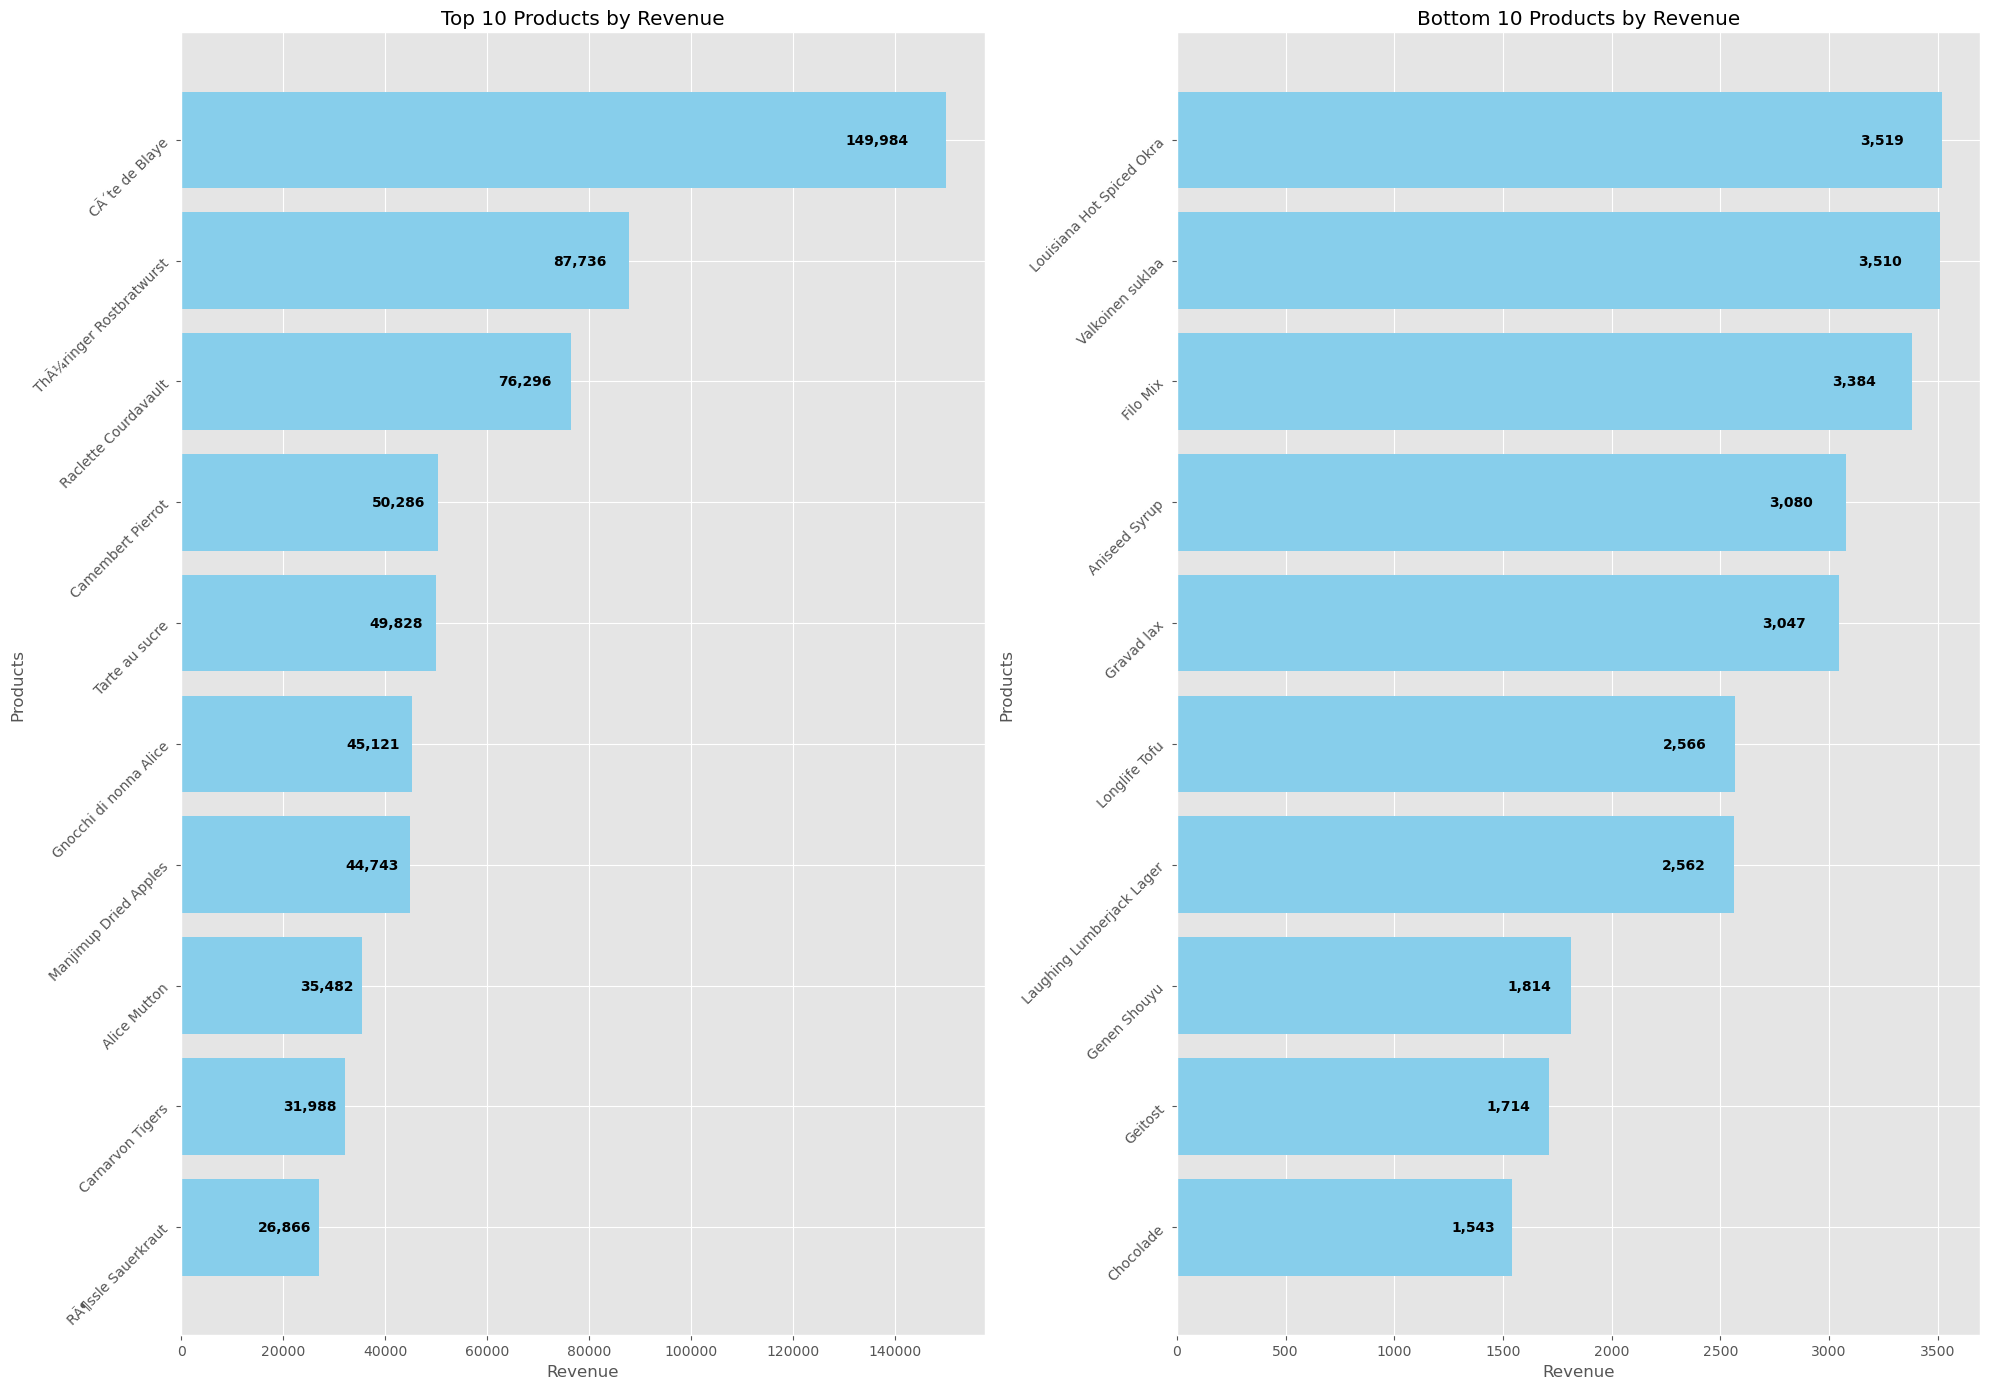

In [34]:
# import matplotlib.pyplot as plt

# Top 10 products by revenue
top_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                           .reset_index()
                           .sort_values("TotalSales", ascending=False)
                           .head(10)
                           .sort_values("TotalSales"))

# Bottom 10 products by revenue
bottom_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                              .reset_index()
                              .sort_values("TotalSales", ascending=True)
                              .head(10))

# Plot sales performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 14))

# Top 10 products bar chart (horizontal)
bars1 = ax1.barh(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')
for bar in bars1:
    xval = bar.get_width()
    ax1.text(xval * 0.95, bar.get_y() + bar.get_height()/2, f'{xval:,.0f}', ha='right', va='center', color='black', fontweight='bold')
ax1.set_title('Top 10 Products by Revenue')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Products')
ax1.tick_params(axis='y', rotation=45)

# Bottom 10 products bar chart (horizontal)
bars2 = ax2.barh(bottom_products_by_revenue['ProductName'], bottom_products_by_revenue['TotalSales'], color='skyblue')
for bar in bars2:
    xval = bar.get_width()
    ax2.text(xval * 0.95, bar.get_y() + bar.get_height()/2, f'{xval:,.0f}', ha='right', va='center', color='black', fontweight='bold')
ax2.set_title('Bottom 10 Products by Revenue')
ax2.set_xlabel('Revenue')
ax2.set_ylabel('Products')
ax2.tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

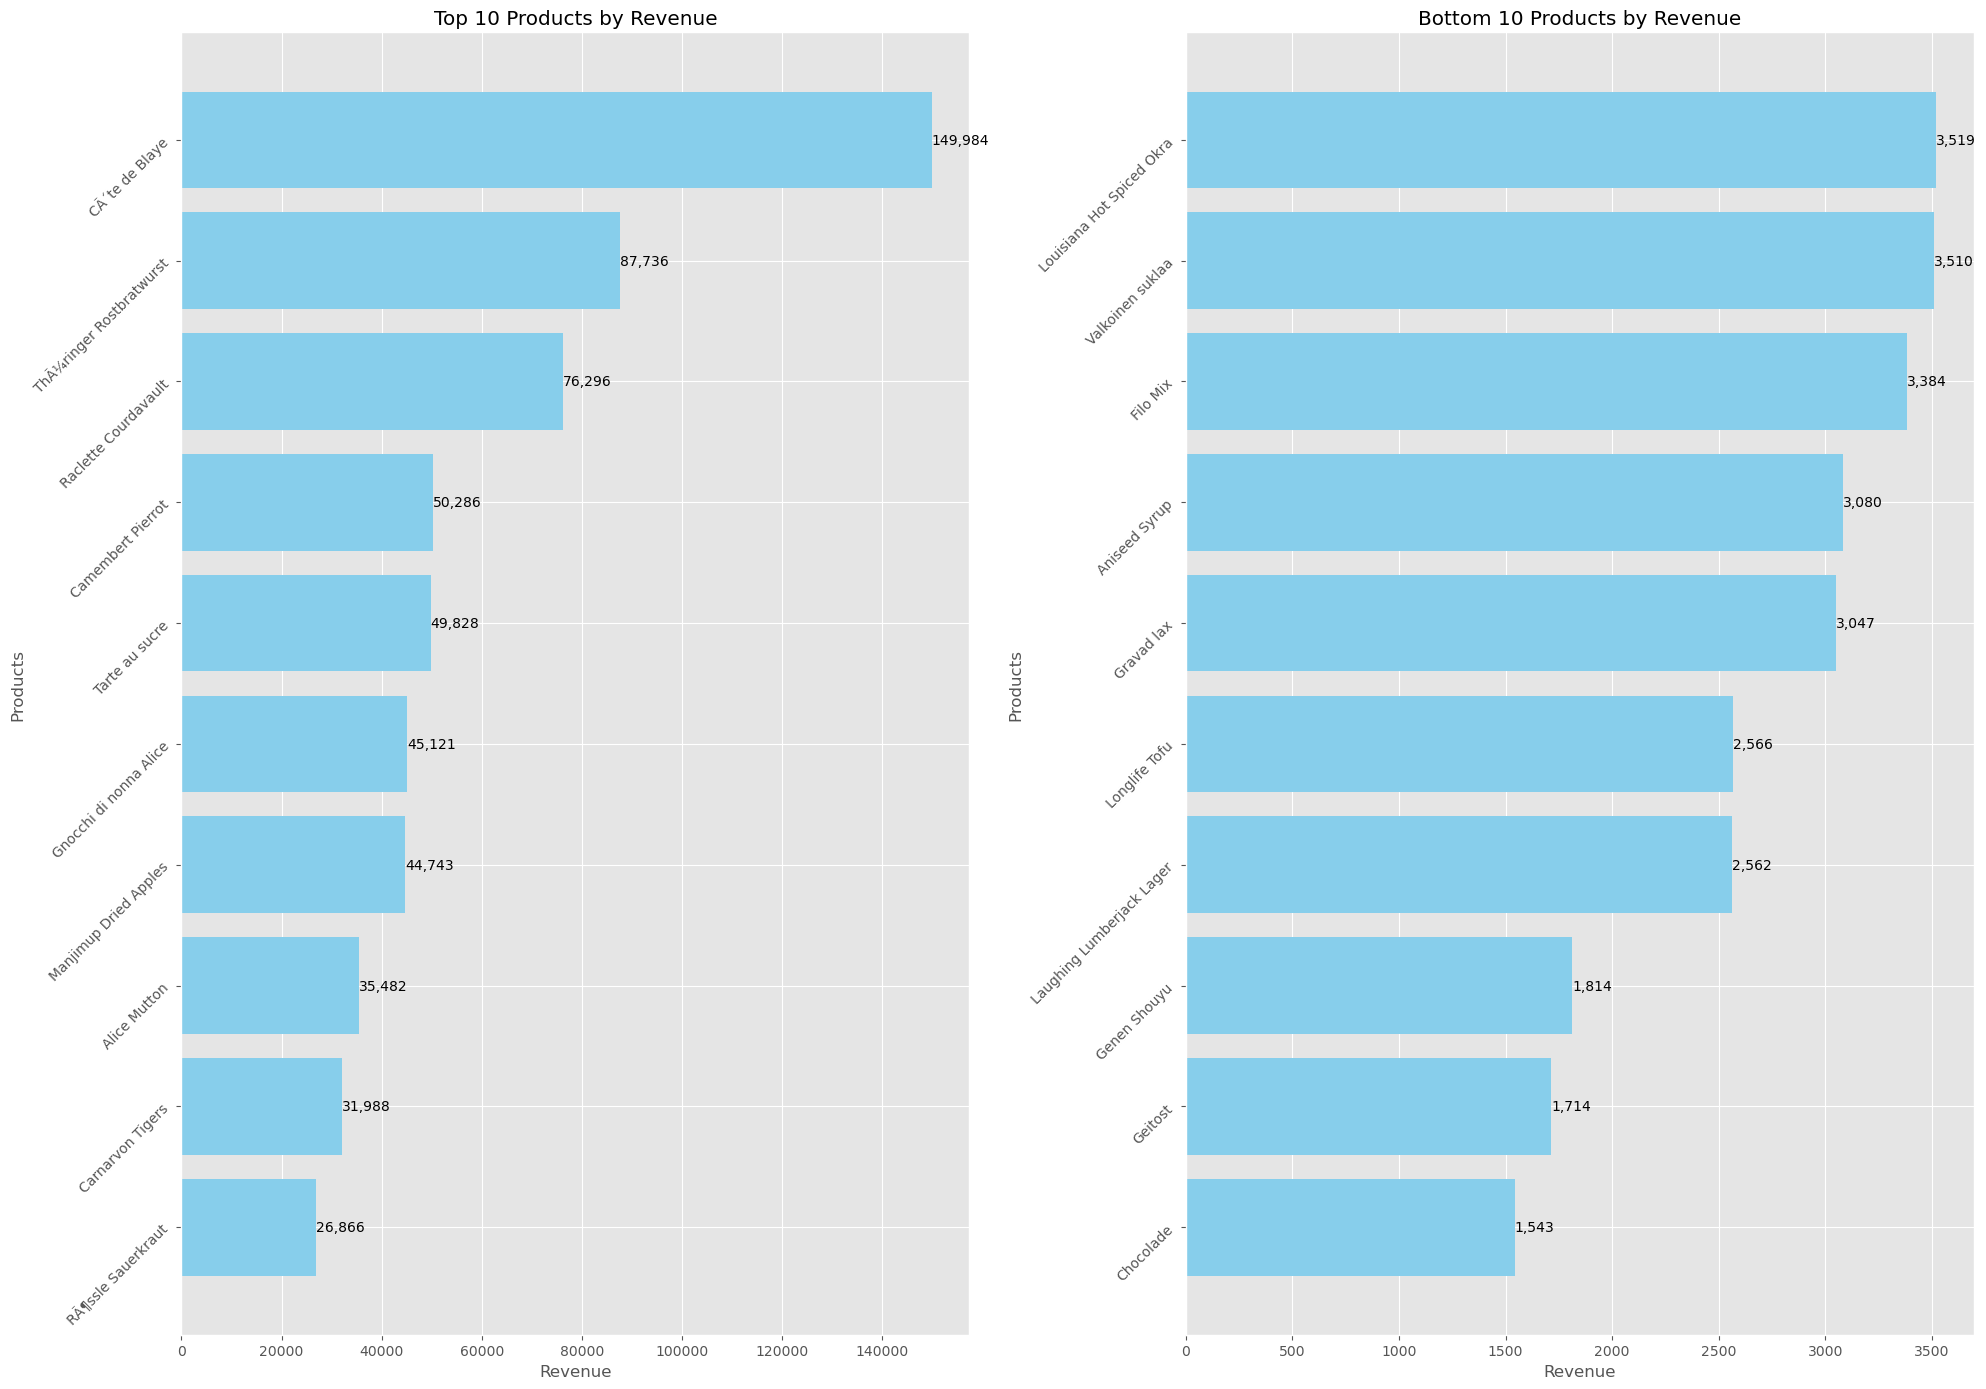

In [32]:
# import matplotlib.pyplot as plt

# Top 10 products by revenue
top_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                           .reset_index()
                           .sort_values("TotalSales",ascending=False)
                           .head(10)
                           .sort_values("TotalSales"))

# Bottom 10 products by revenue
bottom_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                              .reset_index()
                              .sort_values("TotalSales", ascending=True)
                              .head(10))

# Plot sales performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 14))

# Top 10 products bar chart (horizontal)
bars1 = ax1.barh(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')
for bar in bars1:
    xval = bar.get_width()
    ax1.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:,.0f}', ha='left', va='center', color='black')
ax1.set_title('Top 10 Products by Revenue')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Products')
ax1.tick_params(axis='y', rotation=45)

# Bottom 10 products bar chart (horizontal)
bars2 = ax2.barh(bottom_products_by_revenue['ProductName'], bottom_products_by_revenue['TotalSales'], color='skyblue')
for bar in bars2:
    xval = bar.get_width()
    ax2.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:,.0f}', ha='left', va='center', color='black')
ax2.set_title('Bottom 10 Products by Revenue')
ax2.set_xlabel('Revenue')
ax2.set_ylabel('Products')
ax2.tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

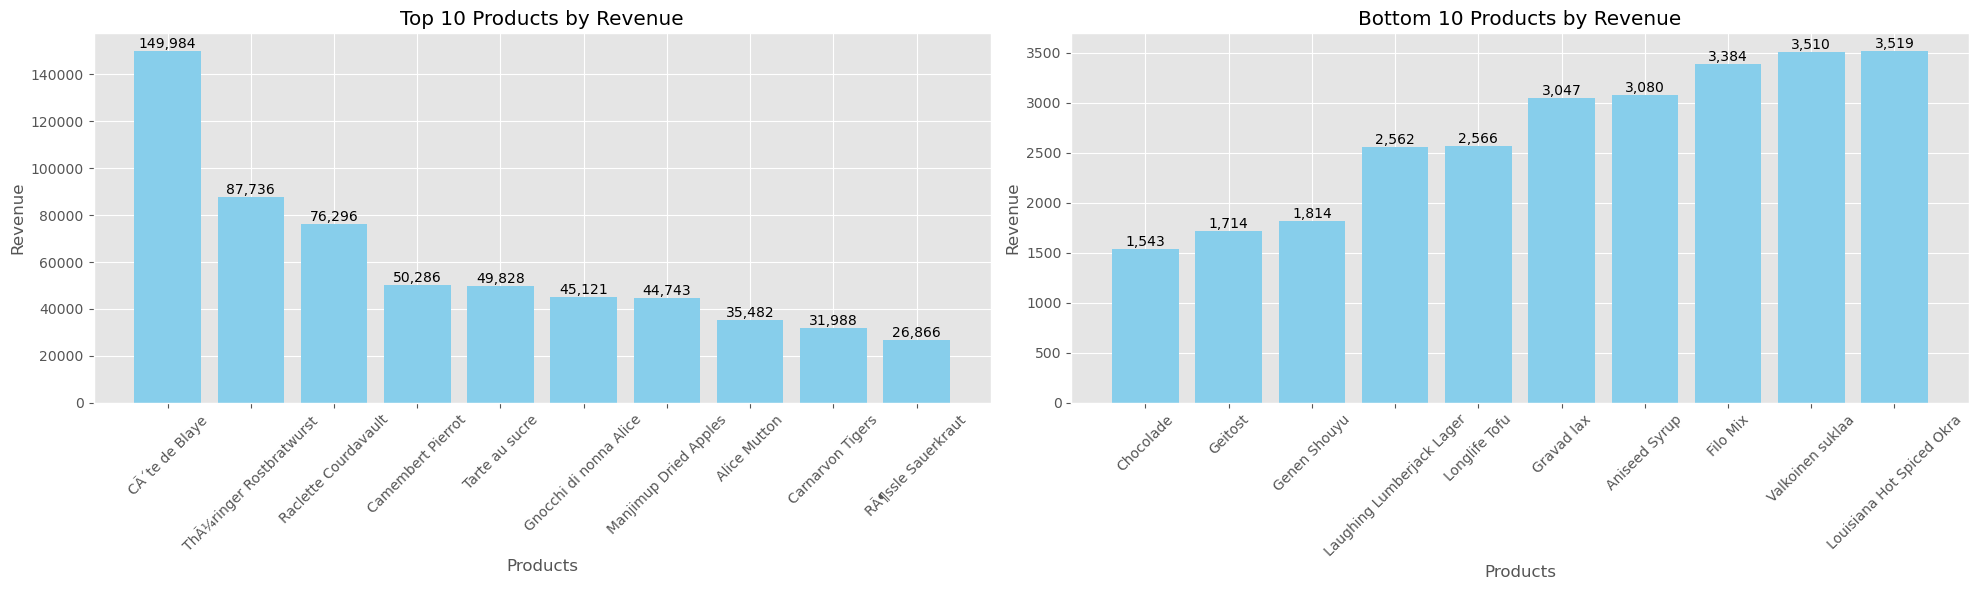

In [22]:

# Top 10 products by revenue
top_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                           .reset_index()
                           .sort_values("TotalSales", ascending=False)
                           .head(10))

# Bottom 10 products by revenue
bottom_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                              .reset_index()
                              .sort_values("TotalSales", ascending=True)
                              .head(10))

# Plot sales performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Top 10 products bar chart
bars1 = ax1.bar(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')
ax1.set_title('Top 10 Products by Revenue')
ax1.set_xlabel('Products')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)

# Bottom 10 products bar chart
bars2 = ax2.bar(bottom_products_by_revenue['ProductName'], bottom_products_by_revenue['TotalSales'], color='skyblue')
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')
ax2.set_title('Bottom 10 Products by Revenue')
ax2.set_xlabel('Products')
ax2.set_ylabel('Revenue')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


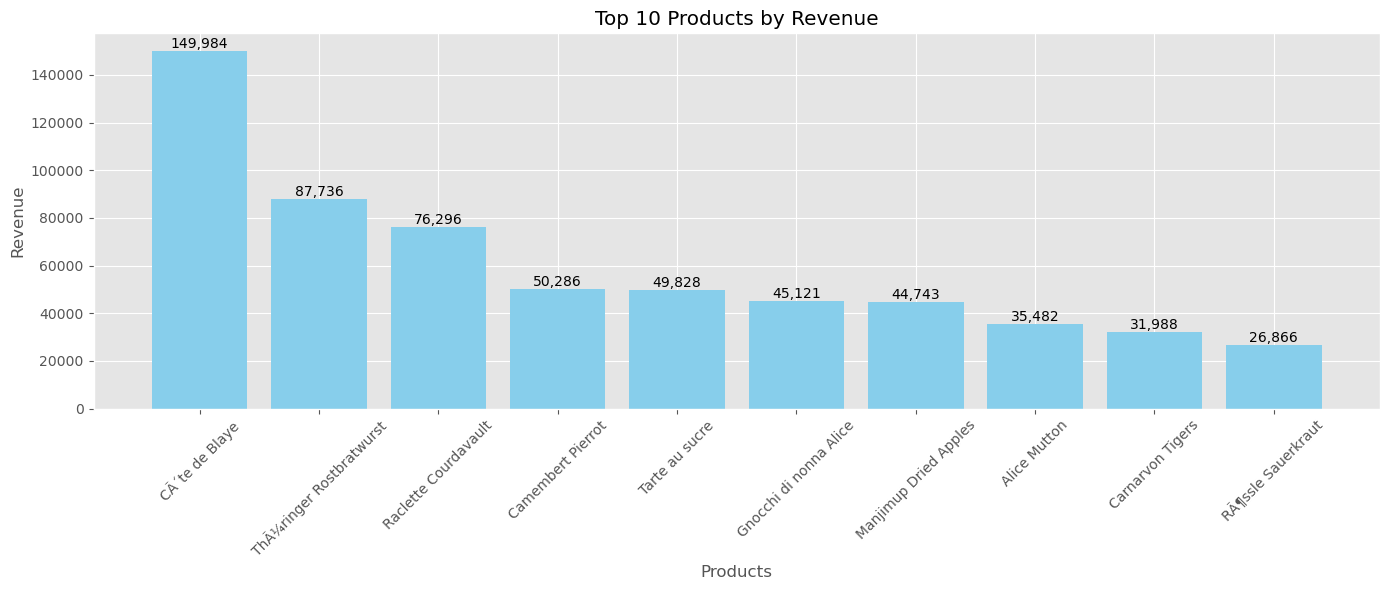

In [19]:
top_products_by_revenue = (products_analysis.groupby('ProductName')['TotalSales'].sum()
                           .reset_index()
                           .sort_values("TotalSales", ascending=False)
                           .head(10)
)

# Plot sales performance
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

ax.set_title('Top 10 Products by Revenue')
ax.set_xlabel('Products')
ax.set_ylabel('Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Top 10 Product by Revenue for each Category

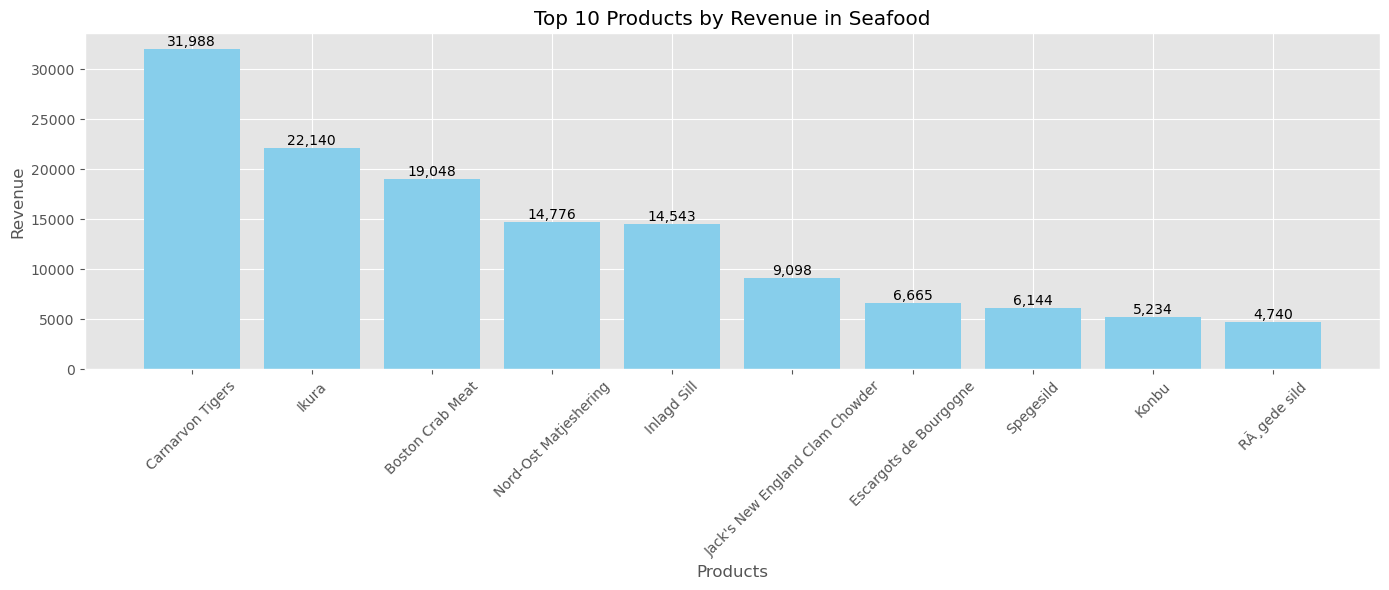

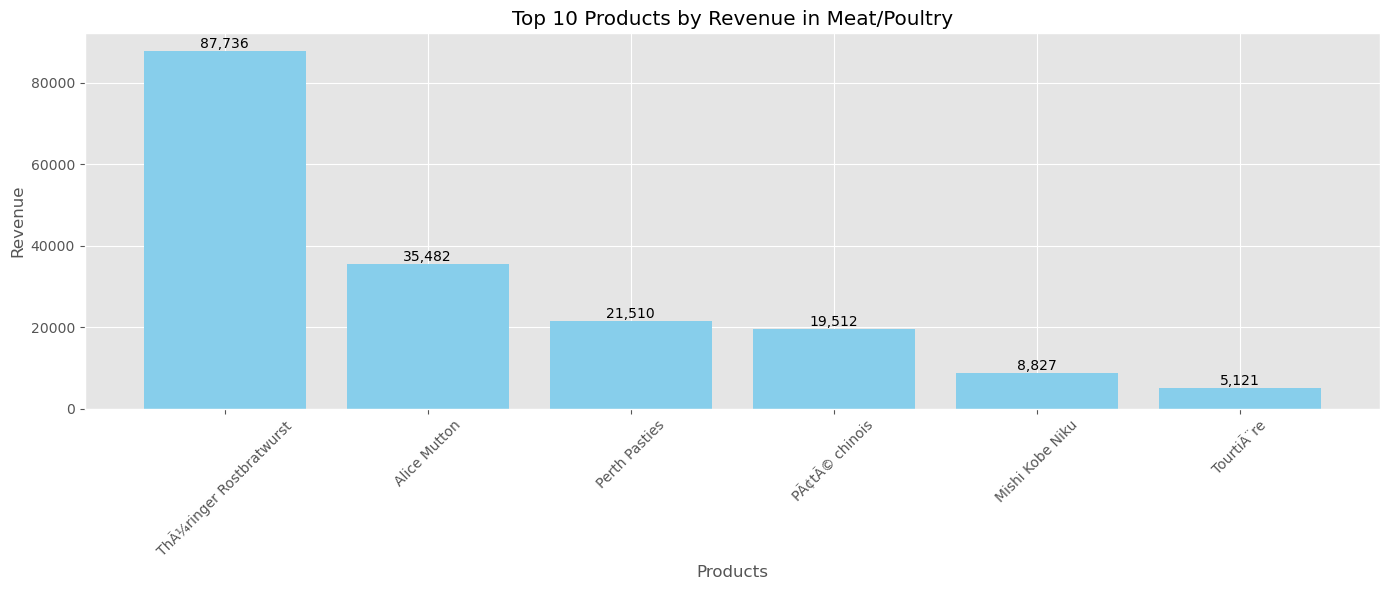

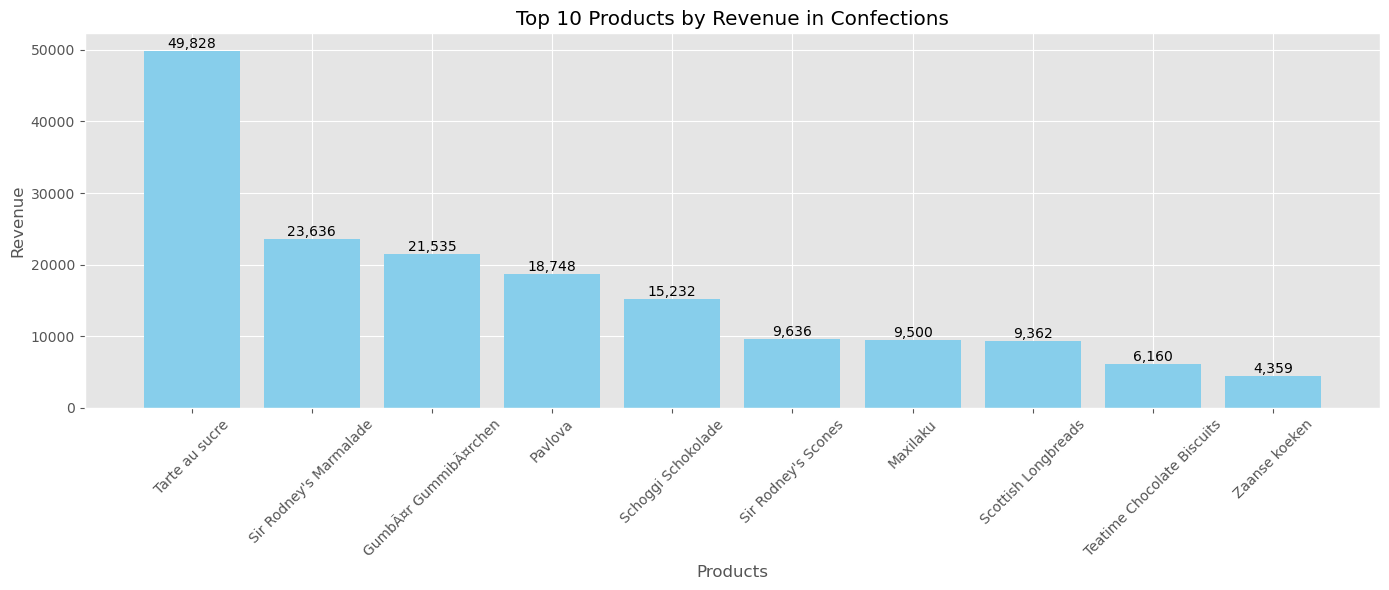

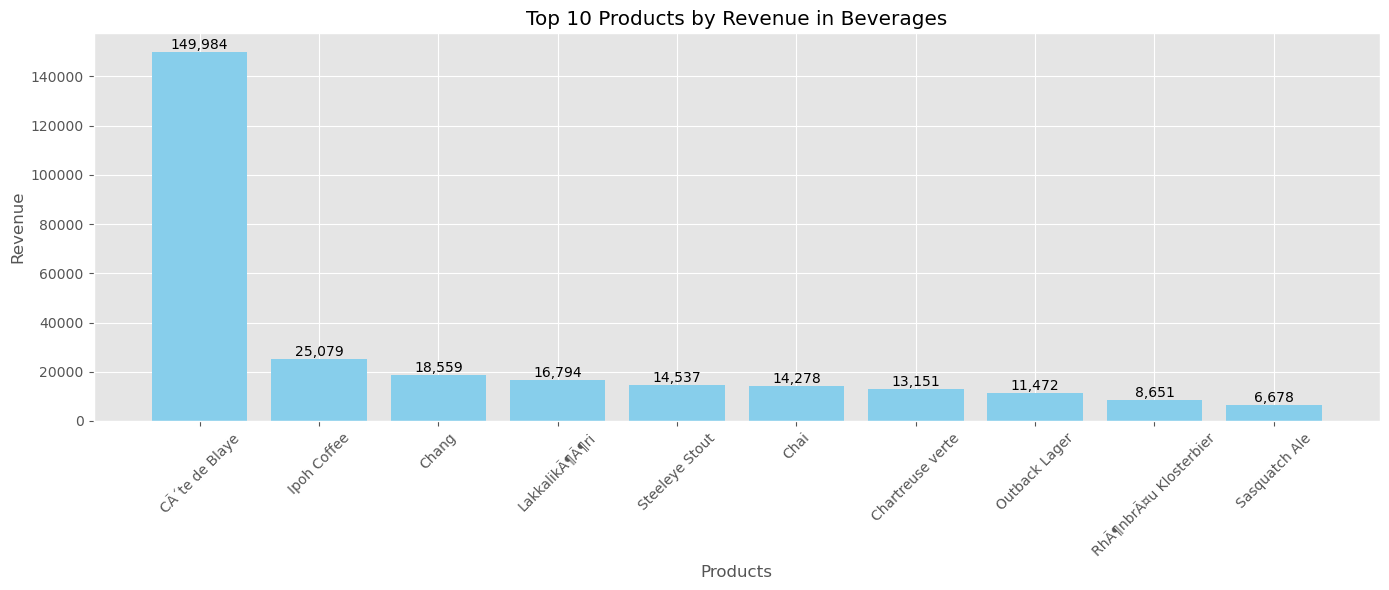

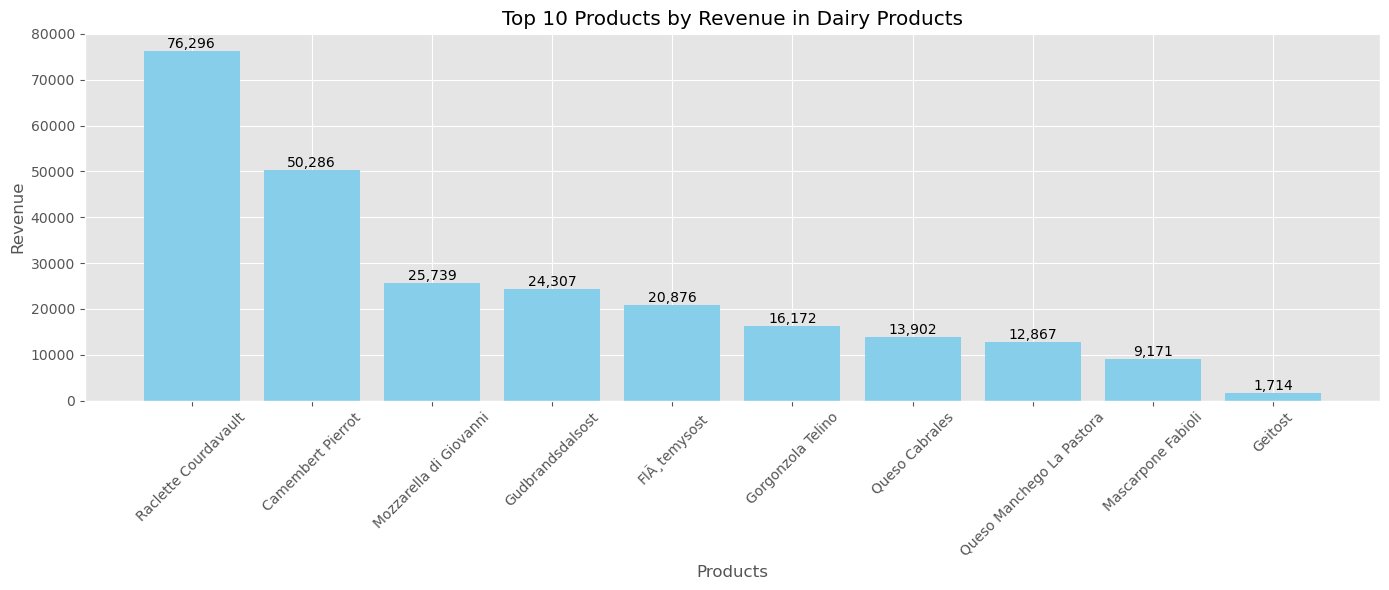

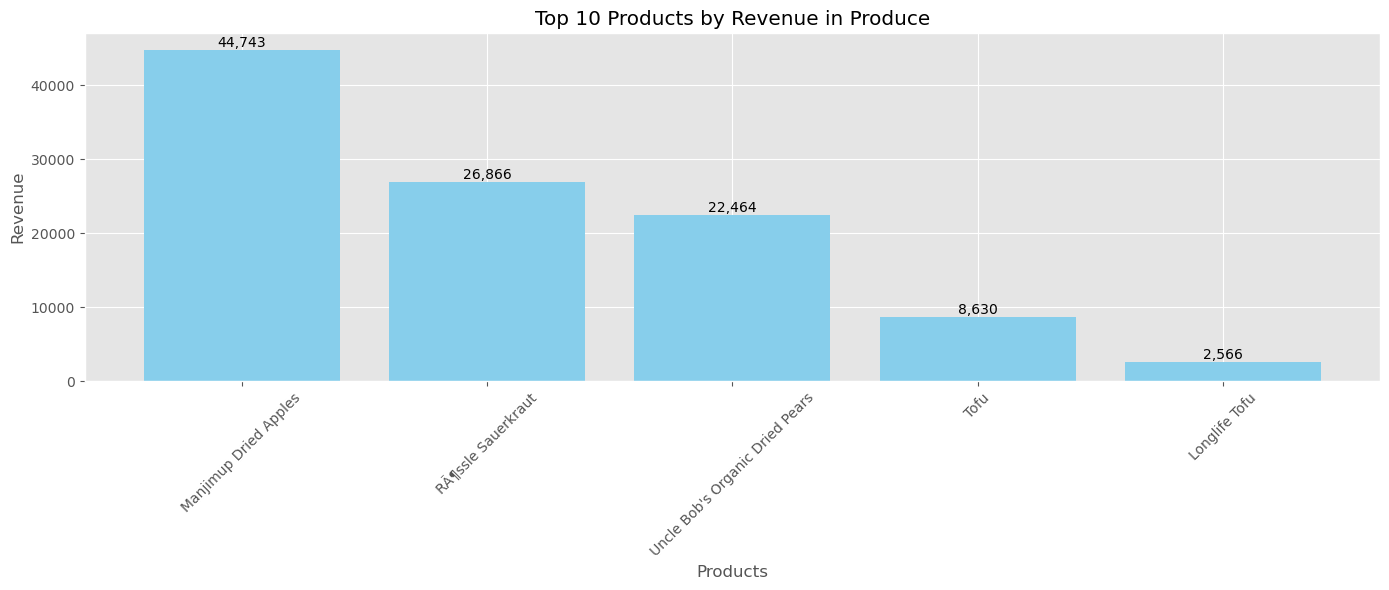

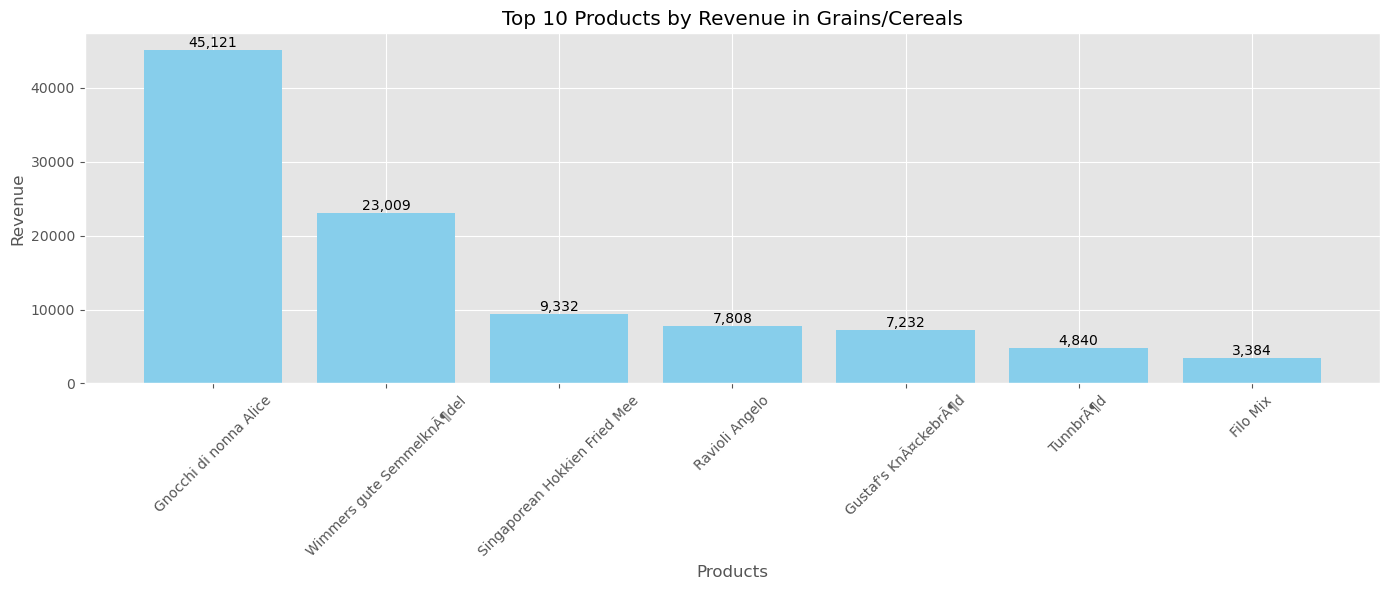

C:\Users\Walee\AppData\Local\Temp\ipykernel_12372\3060305690.py:26: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Walee\miniconda3\envs\data_analysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


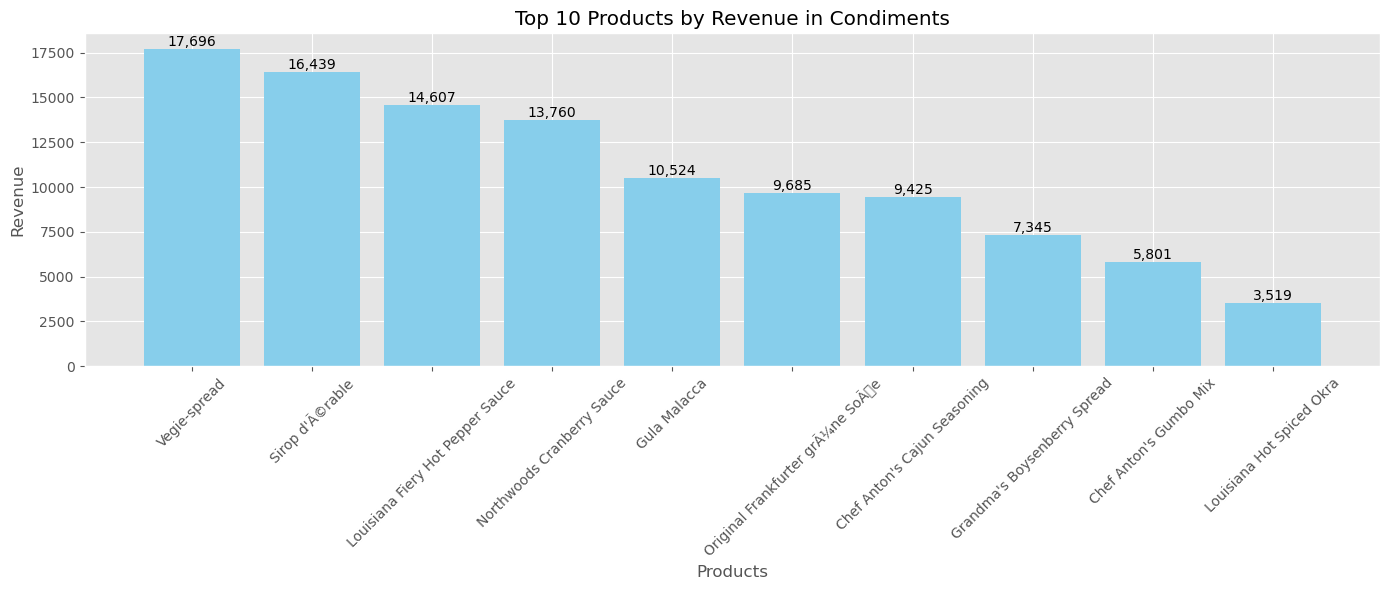

In [18]:
import matplotlib.pyplot as plt

# Loop over each category
for category in products_analysis['CategoryName'].unique():
    top_products_by_revenue = (products_analysis[products_analysis['CategoryName'] == category]
                               .groupby('ProductName')['TotalSales'].sum()
                               .reset_index()
                               .sort_values("TotalSales", ascending=False)
                               .head(10)
    )

    # Plot sales performance
    fig, ax = plt.subplots(figsize=(14, 6))
    bars = ax.bar(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax.set_title(f'Top 10 Products by Revenue in {category}')
    ax.set_xlabel('Products')
    ax.set_ylabel('Revenue')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


### **Objectives of the Analysis Task**

The analysis task of identifying the **top 10 products by revenue** and the **bottom 10 products by revenue** has several key objectives. These objectives are aimed at understanding product performance, optimizing business strategies, and making data-driven decisions. Here are the main objectives of this analysis:

---

### **1. Identify High-Performing Products**
   - **Objective**: Determine which products generate the highest revenue.
   - **Why It Matters**: 
     - Helps in recognizing the most profitable products.
     - Guides decisions on resource allocation, marketing focus, and inventory management.
     - Enables the business to capitalize on successful products by scaling production, increasing marketing efforts, or expanding distribution.

---

### **2. Identify Low-Performing Products**
   - **Objective**: Identify products that generate the least revenue.
   - **Why It Matters**: 
     - Highlights underperforming products that may need improvement, discontinuation, or targeted promotions.
     - Helps in reducing costs associated with low-revenue products (e.g., inventory storage, marketing, or production).
     - Provides insights into potential issues such as poor product-market fit, pricing problems, or lack of demand.

---

### **3. Understand Revenue Distribution**
   - **Objective**: Analyze how revenue is distributed across the product portfolio.
   - **Why It Matters**: 
     - Reveals whether revenue is concentrated in a few top-performing products or more evenly distributed.
     - Helps in assessing the overall health of the product portfolio and identifying dependencies on specific products.

---

### **4. Support Strategic Decision-Making**
   - **Objective**: Provide actionable insights to guide business decisions.
   - **Why It Matters**: 
     - Enables the business to focus on high-revenue products to maximize profitability.
     - Helps in deciding whether to invest in improving low-revenue products or discontinue them.
     - Informs pricing strategies, promotional campaigns, and product development efforts.

---

### **5. Visualize Product Performance**
   - **Objective**: Create clear and intuitive visualizations of product revenue.
   - **Why It Matters**: 
     - Makes it easier to compare the performance of different products.
     - Helps stakeholders (e.g., management, marketing teams) quickly grasp key insights without delving into raw data.
     - Enhances communication and reporting by presenting data in an accessible format.

---

### **6. Monitor Product Trends**
   - **Objective**: Establish a baseline for tracking product performance over time.
   - **Why It Matters**: 
     - Allows the business to monitor changes in product revenue and identify trends (e.g., rising stars or declining products).
     - Helps in evaluating the impact of strategic decisions (e.g., marketing campaigns, pricing changes) on product performance.

---

### **7. Optimize Product Portfolio**
   - **Objective**: Use revenue data to optimize the product mix.
   - **Why It Matters**: 
     - Helps in balancing the product portfolio by focusing on high-revenue products and addressing low-revenue ones.
     - Supports decisions about introducing new products, retiring underperforming ones, or reallocating resources.

---

### **8. Benchmarking and Goal Setting**
   - **Objective**: Use the top and bottom performers as benchmarks for setting goals.
   - **Why It Matters**: 
     - Provides a clear picture of what "good" and "poor" performance looks like.
     - Helps in setting realistic revenue targets for other products.
     - Encourages teams to strive for improvement by comparing their performance to the top products.

---

### **Summary of Objectives**
The primary objectives of this analysis are to:
1. Identify the **top 10 products by revenue** to focus on high-performing products and maximize profitability.
2. Identify the **bottom 10 products by revenue** to address underperforming products and reduce inefficiencies.
3. Visualize and compare product performance to support strategic decision-making.
4. Optimize the product portfolio and allocate resources effectively.

By achieving these objectives, the analysis helps the business improve its overall revenue performance, enhance product strategies, and make informed decisions based on data-driven insights.


### **Insights**

#### **Top 10 Products by Revenue**
1. **Revenue Concentration**: 
   - A few products generate significantly higher revenue compared to others. For example, the top product generates **$180,988**, while the 10th product generates **$26,886**.
   - This indicates that a small number of products contribute disproportionately to the overall revenue.

2. **High-Performing Products**:
   - The top products (e.g., the first few in the list) are clear revenue drivers for the business.
   - These products are likely well-established, popular, or effectively marketed.

3. **Revenue Range**:
   - The revenue range for the top 10 products is wide, from **$26,886** to **$180,988**.
   - This suggests that even among the top performers, there is room for improvement for lower-ranking products.

---

#### **Bottom 10 Products by Revenue**
1. **Low Revenue Generation**:
   - The bottom 10 products generate very low revenue, with the lowest product generating only **$1,543**.
   - These products are underperforming and may not be contributing significantly to the business's profitability.

2. **Revenue Disparity**:
   - There is a significant gap between the top and bottom products. For example, the top product generates **$180,988**, while the bottom product generates only **$1,543**.
   - This highlights a large disparity in product performance.

3. **Potential Issues**:
   - The low revenue of these products could be due to poor market demand, ineffective marketing, pricing issues, or lack of product-market fit.

---

### **Recommendations for Business Decision-Making**

#### **For Top 10 Products**
1. **Focus on High-Performing Products**:
   - **Action**: Allocate more resources (e.g., marketing, inventory, production) to the top-performing products to maximize their revenue potential.
   - **Why**: These products are already successful, and further investment can help sustain or increase their performance.

2. **Upselling and Cross-Selling**:
   - **Action**: Use the top products to drive additional sales by promoting complementary products or upselling higher-margin versions.
   - **Why**: Customers who buy high-revenue products may be more likely to purchase related items.

3. **Monitor Performance**:
   - **Action**: Continuously monitor the performance of these products to ensure they maintain their revenue levels.
   - **Why**: Market conditions can change, and early detection of any decline can help mitigate risks.

---

#### **For Bottom 10 Products**
1. **Evaluate Product Viability**:
   - **Action**: Conduct a thorough analysis of the bottom 10 products to determine why they are underperforming. Consider factors such as pricing, demand, competition, and marketing effectiveness.
   - **Why**: Understanding the root cause of low revenue can help decide whether to improve, discontinue, or reposition these products.

2. **Discontinue Underperforming Products**:
   - **Action**: If the analysis shows that certain products are not viable, consider discontinuing them to free up resources for higher-performing products.
   - **Why**: This can reduce costs associated with inventory, production, and marketing for low-revenue products.

3. **Promotions and Discounts**:
   - **Action**: Implement targeted promotions or discounts to boost sales of underperforming products.
   - **Why**: This can help clear inventory and potentially increase revenue in the short term.

4. **Product Improvement**:
   - **Action**: If the products have potential, consider improving their features, quality, or packaging to make them more appealing to customers.
   - **Why**: This can help reposition the products in the market and increase their revenue contribution.

---

#### **General Recommendations**
1. **Product Portfolio Optimization**:
   - **Action**: Regularly review the product portfolio to ensure a balance between high-revenue and low-revenue products.
   - **Why**: A well-balanced portfolio reduces dependency on a few products and mitigates risks associated with underperforming ones.

2. **Data-Driven Decision-Making**:
   - **Action**: Use data analytics to continuously monitor product performance and make informed decisions.
   - **Why**: Data-driven insights help in identifying trends, opportunities, and risks early.

3. **Customer Feedback**:
   - **Action**: Gather feedback from customers, especially for low-revenue products, to understand their needs and preferences.
   - **Why**: Customer insights can guide product improvements and marketing strategies.

---

### **Summary of Insights and Recommendations**
- **Top 10 Products**: Focus on maximizing revenue from high-performing products through resource allocation, upselling, and continuous monitoring.
- **Bottom 10 Products**: Evaluate the viability of underperforming products, consider discontinuing non-viable ones, and implement strategies like promotions or product improvements to boost their performance.
- **Overall Strategy**: Optimize the product portfolio, use data-driven insights, and gather customer feedback to make informed business decisions.

By acting on these insights and recommendations, the business can improve its revenue performance, reduce inefficiencies, and make strategic decisions to drive growth.

In [ ]:
# Create dropdown widget with "All" as the default option
category_options = ['All'] + list(products_analysis['CategoryName'].unique())
category_dropdown = widgets.Dropdown(
    options=category_options,
    value='All',
    description='Category Name:',
    disabled=False,
    layout=Layout(width='200px')  # Adjust the width as needed
)

# Function to update the plot based on selected category
def update_plot(category):
    if category == 'All':
        filtered_data = products_analysis
    else:
        filtered_data = products_analysis[products_analysis['CategoryName'] == category]
    
    top_products_by_revenue = (filtered_data.groupby('ProductName')['TotalSales'].sum()
                               .reset_index()
                               .sort_values("TotalSales", ascending=False)
                               .head(10))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(top_products_by_revenue['ProductName'], top_products_by_revenue['TotalSales'], color='skyblue')

    # Add values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', color='black')

    ax.set_title('Top 10 Products by Revenue')
    ax.set_xlabel('Products')
    ax.set_ylabel('Revenue')
    plt.xticks(rotation=45)
    
    plt.show()

# Use interact to link the dropdown to the update_plot function
output = widgets.Output()

def on_change(change):
    with output:
        output.clear_output(wait=True)
        update_plot(change['new'])

category_dropdown.observe(on_change, names='value')

# Display the dropdown and the plot side by side
display(HBox([output, category_dropdown]))

# Initial plot
update_plot(category_dropdown.value)